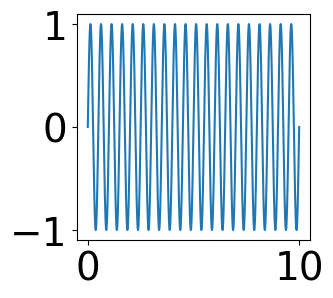

In [51]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['figure.dpi'] = 100

SAMPLE_RATE = 44100  # Hertz
DURATION = 10  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [52]:
_, first_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
t, second_tone = generate_sine_wave(440, SAMPLE_RATE, DURATION)
mixed_tone = first_tone + second_tone

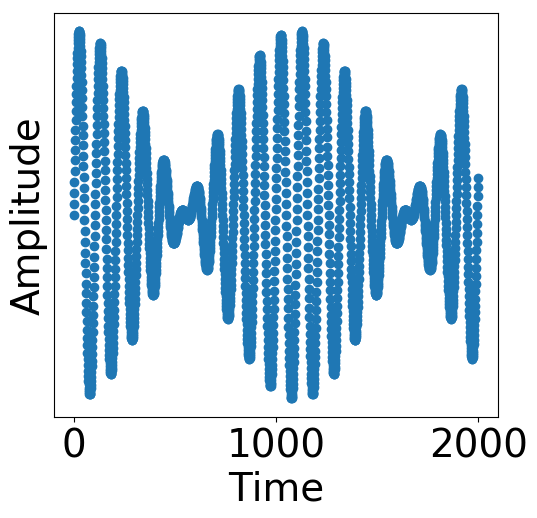

In [53]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)
import matplotlib
import matplotlib

fig, ax = plt.subplots(1, 1)

matplotlib.rcParams.update({'font.size': 28})

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.yticks([])

plt.scatter(range(len(normalized_tone[:2000])),normalized_tone[:2000])
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
plt.savefig('toy_orig_t.png', bbox_inches='tight')

plt.show()

In [54]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd


df_fft = scipy.fftpack.fft(normalized_tone)

In [55]:
N = len(normalized_tone)

yf = sp.fftpack.fft(normalized_tone)
xf = sp.fftpack.fftfreq(N, 1 / SAMPLE_RATE)



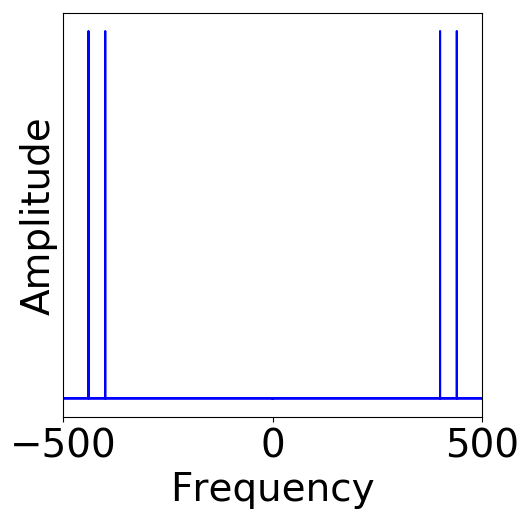

In [56]:
import matplotlib
fig, ax = plt.subplots(1, 1)


ax.set_xlim(-500, 500)
#ax.set_ylim(0, 10000)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_yticks([])

ax.plot(xf,np.abs(yf),'b')
#ax.plot(xf,np.abs(yf),'r.')
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
plt.savefig('toy_nyquist_f.png', bbox_inches='tight')

plt.show()

In [57]:
original = sp.fftpack.ifft(yf)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


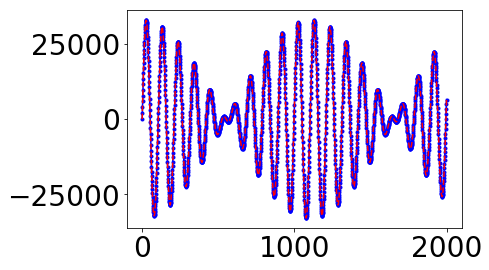

In [8]:
plt.plot( normalized_tone[:2000], 'b.-')
plt.plot(original[:2000], 'r--')
plt.show()

## downsample above nyquist

In [9]:
## need to fix amplitude issue.

In [10]:
#normalized_tone = normalized_tone.set_index(np.linspace(0, duration, sample_rate * duration, endpoint=False))

In [11]:
from scipy import signal
normalized_tone_sampled = signal.resample(normalized_tone, 8900)

In [12]:

yf_2 = sp.fftpack.fft(normalized_tone_sampled)
xf_2 = sp.fftpack.fftfreq(8900, 1 / 890.0)



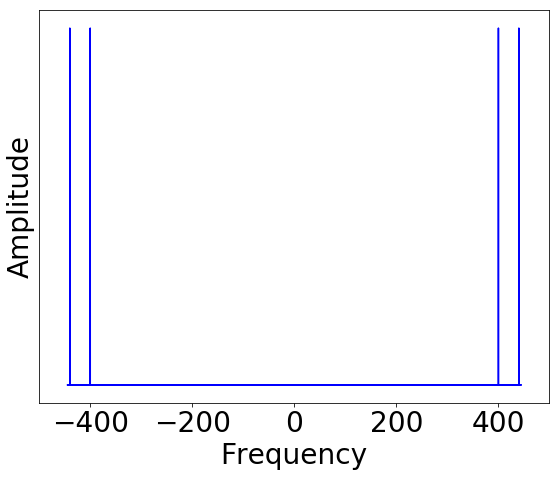

In [13]:
import matplotlib
fig, ax = plt.subplots(1, 1)


ax.set_xlim(-500, 500)
#ax.set_ylim(0, 9000)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_yticks([])

ax.plot(xf_2,np.abs(yf_2),'b')
#ax.plot(xf,np.abs(yf),'r.')
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
plt.savefig('toy_nyquist_f.png', bbox_inches='tight')

plt.show()

In [14]:
yf_2 = np.append(np.append(yf_2[:int(len(yf_2)/2)],[0] * (len(yf)-len(yf_2))),yf_2[int(len(yf_2)/2):])

In [15]:
df_psd_2 = np.abs(yf_2) ** 2
df_psd = np.abs(yf) ** 2

In [16]:
yf_2 = yf_2 * (sum(np.abs(df_psd)) ** 0.5) / (sum(np.abs(df_psd_2)) ** 0.5)

In [17]:
original = sp.fftpack.ifft(yf_2)

/usr/lib/python3/dist-packages/matplotlib/transforms.py:963: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval
/usr/lib/python3/dist-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


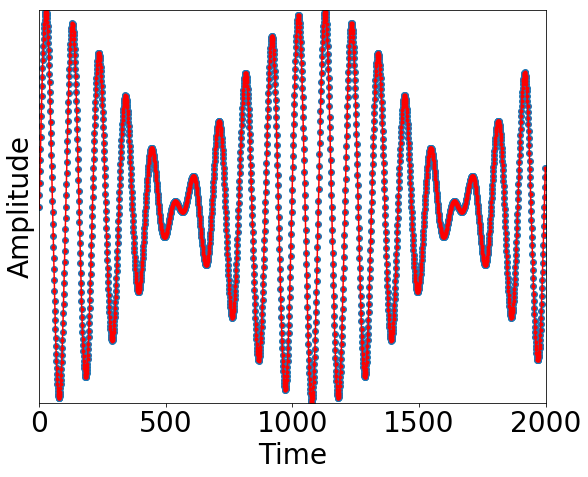

In [18]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim(0, 2000)
ax.set_ylim(min(original), max(original))
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_yticks([])
ax.scatter(range(len(original[:2000])),original[:2000])
ax.plot(normalized_tone[:2000],'r.-')
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
plt.savefig('toy_nyquist_t.png', bbox_inches='tight')

plt.show()

In [19]:
max(np.abs(original))

32766.283044236883

## sample below nyquist

In [58]:
from scipy import signal
normalized_tone_sampled = signal.resample(normalized_tone, 8000)

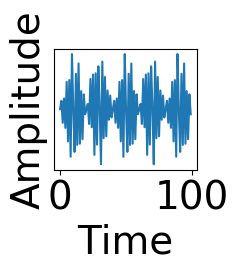

In [59]:
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.yticks([])

plt.plot(normalized_tone_sampled[:100])
plt.tight_layout()

plt.savefig('toy_low_t.png', bbox_inches='tight')

plt.show()

In [60]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
df_fft = scipy.fftpack.fft(normalized_tone_sampled)

In [61]:

yf_3 = sp.fftpack.fft(normalized_tone_sampled)
xf_3 = sp.fftpack.fftfreq(8000, 1 / 800)

In [62]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim(-500, 500)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_yticks([])

plt.plot(xf_3, np.abs(yf_3))
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
plt.savefig('toy_low_f.png', bbox_inches='tight')

plt.show()

In [63]:
yf_3 = np.append(np.append(yf_3[:int(len(yf_3)/2)],[0] * (len(yf)-len(yf_3))),yf_3[int(len(yf_3)/2):])

In [64]:
df_psd_3 = np.abs(yf_3) ** 2
df_psd = np.abs(yf) ** 2
yf_3 = yf_3 * (sum(np.abs(df_psd)) ** 0.5) / (sum(np.abs(df_psd_3)) ** 0.5)

In [65]:
original = sp.fftpack.ifft(yf_3)

In [66]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim(0, 2000)
#ax.set_ylim(min(original), max(original))
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_yticks([])
ax.scatter(range(len(original[:2000])),original[:2000])
ax.plot(range(len(normalized_tone[:2000])),normalized_tone[:2000],'r.-')
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
plt.savefig('toy_nyquist_t.png', bbox_inches='tight')

plt.show()

/usr/lib/python3/dist-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


## go even further below nyquist

In [67]:
from scipy import signal
normalized_tone_sampled = signal.resample(normalized_tone, 6000)

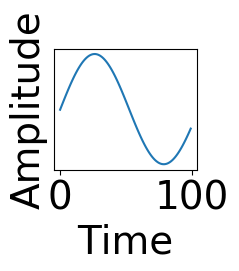

In [68]:
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.yticks([])

plt.plot(normalized_tone[:100])
plt.tight_layout()

plt.savefig('toy_vlow_t.png', bbox_inches='tight')

plt.show()

In [69]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
df_fft = scipy.fftpack.fft(normalized_tone_sampled)

In [70]:

yf_4 = sp.fftpack.fft(normalized_tone_sampled)
xf_4 = sp.fftpack.fftfreq(6000, 1 / 600)

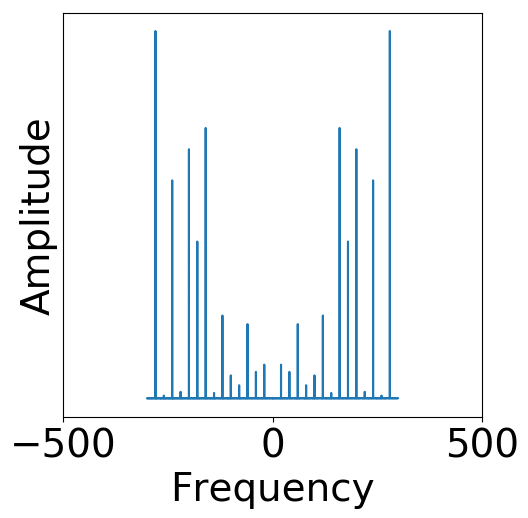

In [71]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim(-500, 500)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.set_yticks([])

plt.plot(xf_4, np.abs(yf_4))
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

plt.savefig('toy_vlow_f.png', bbox_inches='tight')

plt.show()

In [72]:
yf_4 = np.append(np.append(yf_4[:int(len(yf_4)/2)],[0] * (len(yf)-len(yf_4))),yf_4[int(len(yf_4)/2):])

In [73]:
df_psd_4 = np.abs(yf_4) ** 2
df_psd = np.abs(yf) ** 2
yf_4 = yf_4 * (sum(np.abs(df_psd)) ** 0.5) / (sum(np.abs(df_psd_4)) ** 0.5)

In [74]:
original = sp.fftpack.ifft(yf_4)

/usr/lib/python3/dist-packages/matplotlib/transforms.py:963: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval
/usr/lib/python3/dist-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


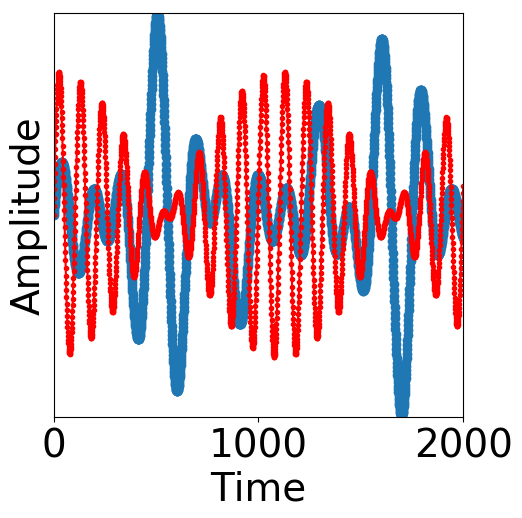

In [76]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim(0, 2000)
ax.set_ylim(min(original), max(original))
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.set_yticks([])
ax.scatter(range(len(original[:2000])),original[:2000])
ax.plot(normalized_tone[:2000],'r.-')
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
plt.savefig('toy_nyquist_t.png', bbox_inches='tight')

plt.show()

## 